## Precio de las casa en Boston

Os dejamos en el apartado de datos de Teoría información sobre la vivienda en Boston. Un conjunto de datos con los siguientes campos informados:

    1. CRIM     Crimen per cápita por ciudad
    2. ZN       Proporción de zona marcada como residencial para espacios superiores 25,000 sq.ft.
    3. INDUS    Proporción de acres comerciales no minoristas por ciudad
    4. CHAS     Variable Charles River dummy (= 1 si el trazado limita con el río; 0 otro)
    5. NOX      Concentración de óxidos nítricos (partes por 10 millones)
    6. RM       Número medio de habitaciones por vivienda
    7. AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    8. DIS      Distancias ponderadas a cinco centros de empleo de Boston
    9. RAD      Índice de accesibilidad a las autopistas radiales
    10. TAX      Tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
    11. PTRATIO  Ratio alumnos-profesor por ciudad
    12. B        1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
    13. LSTAT    % estatus inferior de la población
    14. PRICE    Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

Para este ejercicio os pedimos que os asocies entre dos o tres compañeros para hacer un análisis de estos datos. Disponéis de multitud de herramientas para obtener información estadística de como es la vida en Boston.

Para la correcta realización del ejercicio deberéis:

* Crear un repositorio de Github.
* El repositorio deberá contener al menos:
    * Un README.md donde se describe la tarea realizada y los nombres del equipo
    * Una carpeta _data_ con la copia de los datos.
    * Uno o varios Notebooks con el ejercicio realizado, a modo de informe de conclusiones.
    * Un fichero _requirements.txt_ que liste las librerías se han utilizado (numpy, pandas, etc.)
* El informe resultante deberá contener conclusiones sobre la región de Boston. Posiblemente podáis encontrar la forma de representar vuestras conclusiones de manera visual.

Podéis recurrir a plataformas donde además encontréis información adicional sobre esta región: https://www.kaggle.com/datasets/yingzhou474/boston-neighborhoods-geojson/data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #libreria para ver las leyendas

import seaborn as sns

In [3]:
boston_precio_casas = pd.read_csv('boston_house_prices.csv', header=1)
boston_precio_casas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
boston_precio_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
#Indice de criminalidad minimo, maximo
minimocrimi_boston =boston_precio_casas['CRIM'].min()
maximocrimi_boston = boston_precio_casas['CRIM'].max()
print(f'El indice de criminalidad minimo en Boston es: {minimocrimi_boston} y el indice maximo: {maximocrimi_boston}')


El indice de criminalidad minimo en Boston es: 0.00632 y el indice maximo: 88.9762


In [13]:
# Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
minimovalor_boston =boston_precio_casas['MEDV'].min()
maximovalor_boston = boston_precio_casas['MEDV'].max()
print(f'Valor minimo de las viviendas: {minimovalor_boston} y el valor maximo: {maximovalor_boston}')


Valor minimo de las viviendas: 5.0 y el valor maximo: 50.0


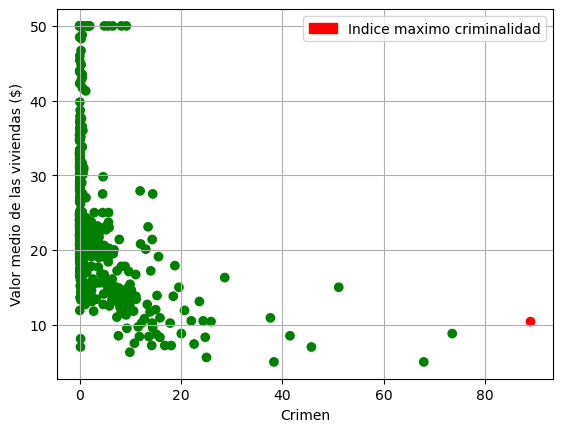

In [46]:
boston_precio_casas
# Gráfico

color = np.where(boston_precio_casas['CRIM'] == maximocrimi_boston , "red", "green")


fig, ax = plt.subplots()
ax.scatter(boston_precio_casas["CRIM"], boston_precio_casas["MEDV"], c=color)
plt.xlabel("Crimen")
plt.ylabel("Valor medio de las viviendas ($)")
rojo = mpatches.Patch(color = "red", label = "Indice maximo criminalidad")
                                                #verde = mpatches.Patch(color = "green", label = "Puntos verdes")
plt.legend(handles = [rojo])                    #plt.legend(handles = [rojo,verde])
plt.grid(True)
plt.show() 


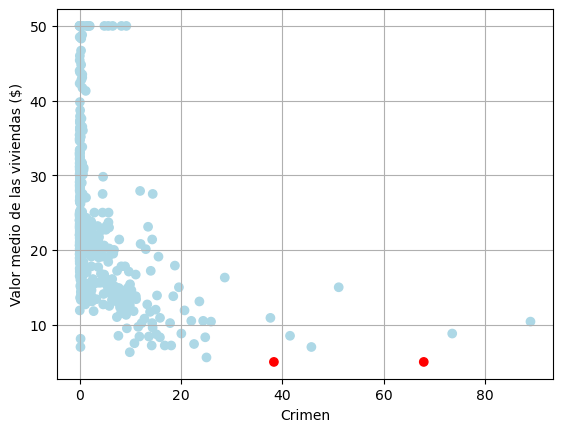

In [40]:
boston_precio_casas
# Gráfico

color = np.where(boston_precio_casas['MEDV'] == minimovalor_boston, "red", "lightblue")


fig, ax = plt.subplots()
ax.scatter(boston_precio_casas["CRIM"], boston_precio_casas["MEDV"], c=color)
plt.xlabel("Crimen")
plt.ylabel("Valor medio de las viviendas ($)")
plt.grid(True)
plt.show() 


In [ ]:
#Indice de accesibilidad a las autopistas y el valor de las casas